Modelo de Regressão Linear. Grupo: Enzo Kozonoe 2022010384 - Luiz Fernando Costa Silva 2022003915 - Lucas de Paula Souza 2022013072

Primeiramente, adicionaram-se, com o comando import, as bibliotecas nescessárias para a realização dos testes

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

O arquivo CSV 'winequalityN.csv' é lido, armazenando seus dados em um DataFrame chamado 'wine'. Após isso, são exibidas as primeiras linhas do DataFrame

In [19]:
wine = pd.read_csv('winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Em seguida, exibe-se na tela uma visão geral sobre um DataFrame, com informações concisas, tais como o número de entradas não nulas em cada coluna, o tipo de dado de cada coluna e o uso de memória.

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Posteriormente, remove-se todas as linhas do DataFrame original, ou seja, sem criar cópias, nas quais existe pelo menos um valor nulo (NaN). Depois, mostra-se a quantidade de valores nulos por coluna.

In [21]:
wine.dropna(inplace=True)
wine.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

A seguir, são excluídas todas as colunas que são do tipo "object", bem como é calculada a matriz de correlação para todas as colunas numérias em "numeric_wine".

In [22]:
numeric_wine = wine.select_dtypes(exclude=['object'])

correlation_matrix = numeric_wine.corr()

Além disso, configura-se o tamanho da figura, a criação do heatmap com valores numéricos e a exibição do gráfico da matriz de correlação.
A matriz de correlação plotada nos mostra como cada coluna numérica se relaciona com as outras usando valores de 1 a -1. Os valores próximos a 1 indicam uma forte correlação positiva, enquanto os valores próximos a -1 indicam uma forte correlação negativa, e os valores próximos a 0 indicam pouca ou nenhuma correlação.

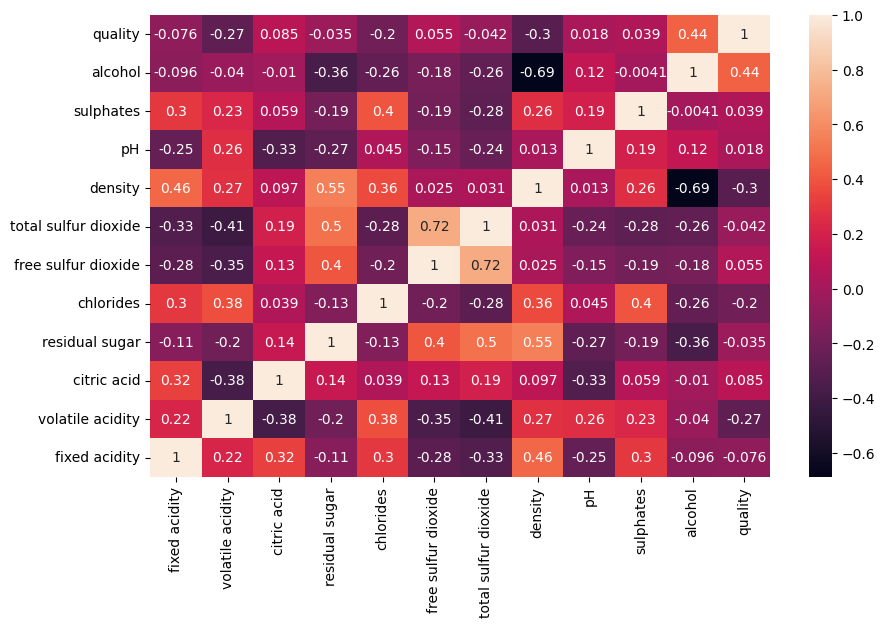

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.ylim(0, 12)
plt.show()

Realiza-se o pré-processamento dos dados, excluindo a coluna 'type' que contém strings. Em seguida, prepara os dados para treinamento do modelo. Os dados são divididos em conjuntos de treino e teste, normalizados e utilizados para treinar um modelo de regressão linear. A avaliação do modelo é realizada utilizando o coeficiente de determinação (R²), que fornece uma medida do desempenho do modelo nos dados de teste.

In [24]:
wine = wine.drop(['type'], axis=1)
x_values = wine.drop(['alcohol'],axis=1).values
y_values = wine['alcohol'].values

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

pipe = Pipeline([('scaler', StandardScaler())])
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

my_model = LinearRegression()
my_model.fit(x_train, y_train)
print(my_model.score(x_test, y_test))

0.822867726346168


Seguidamente, realiza-se a predição dos rótulos tanto para os dados de teste quanto para os dados de treinamento usando o modelo de regressão linear treinado anteriormente. Defini-se uma função chamada "print_evaluate" para calcular e imprimir métricas de avaliação do modelo, como Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE) e Coeficiente de Determinação (R²). As métricas são exibidas separadamente para os dados de teste e treinamento, proporcionando uma visão abrangente do desempenho do modelo.

In [25]:
test_pred = my_model.predict(x_test)
train_pred = my_model.predict(x_train)

def print_evaluate(real, predicted):
  mae = metrics.mean_absolute_error(real, predicted)
  mse = metrics.mean_squared_error(real, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(real, predicted))
  r2_square = metrics.r2_score(real, predicted)
  
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square', r2_square)
  print('__________________________________')
  
print("Dados de teste:")
print_evaluate(y_test, test_pred)
print("\nDados de treinamento:")
print_evaluate(y_train, train_pred)

Dados de teste:
MAE: 0.3989843612973598
MSE: 0.26681814760634337
RMSE: 0.5165444294601805
R2 Square 0.822867726346168
__________________________________

Dados de treinamento:
MAE: 0.3902429824443842
MSE: 0.2907334124101731
RMSE: 0.5391970070486047
R2 Square 0.7923181301457404
__________________________________


Por fim, um gráfico de dispersão é criado para visualizar como as previsões (eixo y) se comparam aos valores reais (eixo x). Isso permite uma inspeção visual da precisão do modelo. Além disso, os parâmetros do modelo (interceptação e coeficientes) e o R² para os dados de teste são impressos, fornecendo mais informações sobre a qualidade do ajuste do modelo aos dados de teste. Este gráfico de dispersão compara visualmente os valores reais com as previsões do modelo. Cada ponto representa uma observação nos dados de teste, permitindo uma análise visual da precisão do modelo. Idealmente, os pontos estariam próximos à linha diagonal, indicando uma correspondência perfeita entre os valores reais e as previsões. Desvios significativos podem indicar áreas onde o modelo pode ser aprimorado.

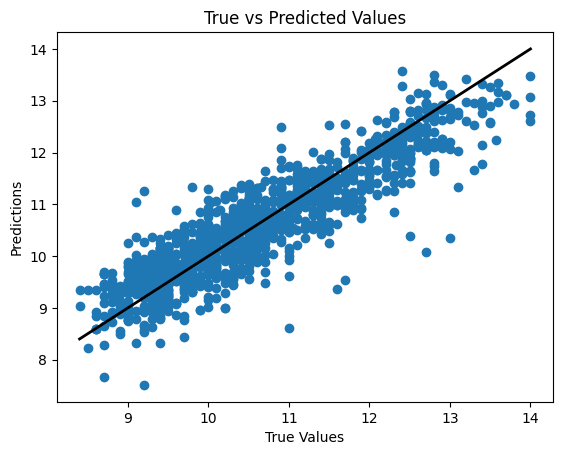

In [26]:

plt.scatter(y_test, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)

plt.show()